# 정밀도와 재현율의 Trade-Off

In [2]:
import pandas as pd

wine_url = 'https://raw.githubusercontent.com/PinkWink/ML_tutorial/master/dataset/wine.csv'

wine = pd.read_csv(wine_url, index_col=0)
wine['taste'] = [1. if grade > 5 else 0 for grade in wine['quality']]

x = wine.drop(['taste', 'quality'], axis=1)
y = wine['taste']

In [3]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y,
                                                    test_size=0.2,
                                                    random_state=13)

In [4]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

lr = LogisticRegression(solver='liblinear', random_state=13)
lr.fit(x_train, y_train)

y_pred_tr = lr.predict(x_train)
y_pred_test = lr.predict(x_test)

print('Train Acc : ', accuracy_score(y_train, y_pred_tr))
print('Test Acc : ', accuracy_score(y_test, y_pred_test))

Train Acc :  0.7427361939580527
Test Acc :  0.7438461538461538


In [5]:
from sklearn.metrics import classification_report

print(classification_report(y_test, lr.predict(x_test)))

              precision    recall  f1-score   support

         0.0       0.68      0.58      0.62       477
         1.0       0.77      0.84      0.81       823

    accuracy                           0.74      1300
   macro avg       0.73      0.71      0.71      1300
weighted avg       0.74      0.74      0.74      1300



In [6]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y_test, lr.predict(x_test))

array([[275, 202],
       [131, 692]])

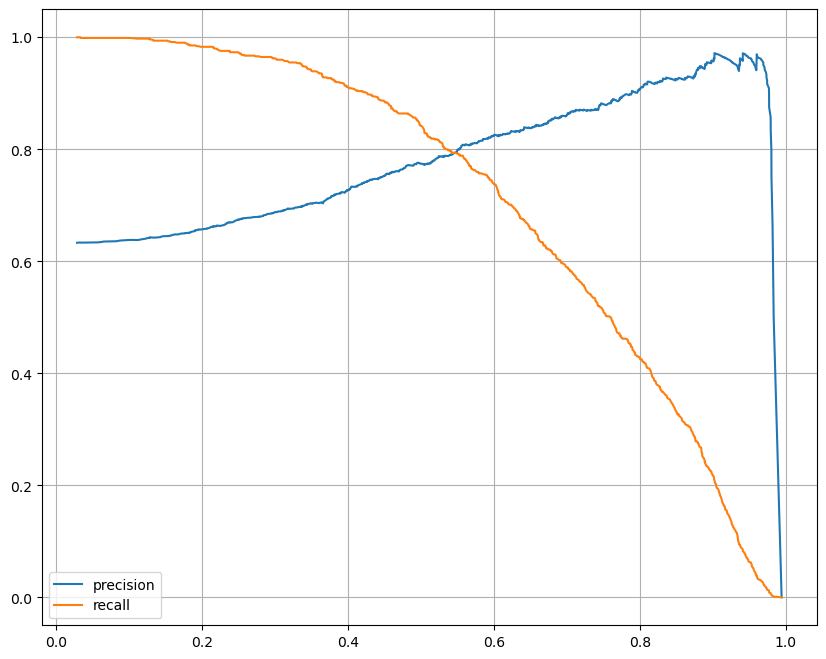

In [8]:
import matplotlib.pyplot as plt
from sklearn.metrics import precision_recall_curve
%matplotlib inline

plt.figure(figsize=(10,8))
pred = lr.predict_proba(x_test)[:, 1]
precisions, recalls, thresholds = precision_recall_curve(y_test, pred)

plt.plot(thresholds, precisions[:len(thresholds)], label='precision')
plt.plot(thresholds, recalls[:len(thresholds)], label='recall')
plt.grid()
plt.legend()
plt.show()

In [9]:
pred_proba = lr.predict_proba(x_test)
pred_proba[:3]

array([[0.40495499, 0.59504501],
       [0.50982649, 0.49017351],
       [0.10201781, 0.89798219]])

In [10]:
import numpy as np

np.concatenate([pred_proba, y_pred_test.reshape(-1, 1)], axis=1)

array([[0.40495499, 0.59504501, 1.        ],
       [0.50982649, 0.49017351, 0.        ],
       [0.10201781, 0.89798219, 1.        ],
       ...,
       [0.22566398, 0.77433602, 1.        ],
       [0.67373744, 0.32626256, 0.        ],
       [0.31416304, 0.68583696, 1.        ]])

In [11]:
from sklearn.preprocessing import Binarizer

binarizer = Binarizer(threshold=0.6).fit(pred_proba)
pred_bin = binarizer.transform(pred_proba)[:, 1]

pred_bin

array([0., 0., 1., ..., 1., 0., 1.])

In [14]:
print(classification_report(y_test, pred_bin))

              precision    recall  f1-score   support

         0.0       0.62      0.73      0.67       477
         1.0       0.82      0.74      0.78       823

    accuracy                           0.73      1300
   macro avg       0.72      0.73      0.72      1300
weighted avg       0.75      0.73      0.74      1300



In [15]:
np.concatenate([pred_proba, pred_bin.reshape(-1, 1)], axis=1)

array([[0.40495499, 0.59504501, 0.        ],
       [0.50982649, 0.49017351, 0.        ],
       [0.10201781, 0.89798219, 1.        ],
       ...,
       [0.22566398, 0.77433602, 1.        ],
       [0.67373744, 0.32626256, 0.        ],
       [0.31416304, 0.68583696, 1.        ]])